In [1]:
import warnings
warnings.filterwarnings(action='once')
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import datetime
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pickle
%load_ext autoreload
%autoreload 2
%matplotlib inline
from exp.misc import *
from exp.ProcessData import *
from exp.PytorchModels import *
from exp.LearnerClass import *
import torch
import torch.nn as nn
import torch.utils.data as D
import torch.nn.functional as F
import copy
from torchvision import transforms
import PIL.Image
from sklearn.metrics import roc_auc_score
import torchvision.transforms.functional as TF
from types import MethodType


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got

In [2]:
params=json_to_parameters('config.json')


In [3]:
test_df=pd.read_csv(params.path.data+'test.csv')
prepare_df(test_df)
test_df=test_df.reset_index(drop=True)


tf_efficientnet_b5_ns_image_mlps_cut_128_seed_fullv_predict.pth 108
tf_efficientnet_b3_ns_image_mlps_cut_128_seed_fullv_predict.pth 144
tf_efficientnet_b4_ns_image_mlps_cut_128_seed_fullv_predict.pth 144
tf_efficientnet_b6_ns_image_mlps_cut_128_seed_fullv_large_predict.pth 144
tf_efficientnet_b7_ns_image_mlps_cut_128_seed_fullv_predict.pth 108
tf_efficientnet_b5_ns_image_mlps_cut_128_seed_fullv_transformer_origonly_focal_lr_predict.pth 144
tf_efficientnet_b7_ns_image_mlps_cut_128_seed_fullv_transformer_origonly_predict.pth 144
tf_efficientnet_b3_ns_image_mlps_cut_128_seed_fullv_transformer_sample_origonly_rand23_predict.pth 288
tf_efficientnet_b6_ns_image_mlps_cut_128_seed_fullv_large_transformer_sample_origonly_rand23_predict.pth 288
tf_efficientnet_b4_ns_image_mlps_cut_128_seed_fullv_transformer_sample_origonly_rand23_predict.pth 288


10.0

4.8839895e-26

1.0

0.091845155

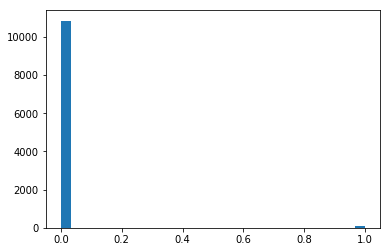

In [13]:
predss_arr=[('tf_efficientnet_b5_ns_image_mlps_cut_128_seed_fullv_predict.pth',1.),
#             ('tf_efficientnet_b5_ns_image_mlps_cut_128_seed_fullv_large_predict.pth',1.),
            ('tf_efficientnet_b3_ns_image_mlps_cut_128_seed_fullv_predict.pth',1.),
            ('tf_efficientnet_b4_ns_image_mlps_cut_128_seed_fullv_predict.pth',1.),
            ('tf_efficientnet_b6_ns_image_mlps_cut_128_seed_fullv_large_predict.pth',1.),
            ('tf_efficientnet_b7_ns_image_mlps_cut_128_seed_fullv_predict.pth',1.),
#             ('tf_efficientnet_b5_ns_image_mlps_cut_128_seed_fullv_large_transformer_linear_origonly_recalc_predict.pth',1),
            ('tf_efficientnet_b5_ns_image_mlps_cut_128_seed_fullv_transformer_origonly_focal_lr_predict.pth',1.),
            ('tf_efficientnet_b7_ns_image_mlps_cut_128_seed_fullv_transformer_origonly_predict.pth',1.),
            ('tf_efficientnet_b3_ns_image_mlps_cut_128_seed_fullv_transformer_sample_origonly_rand23_predict.pth',1.),
            ('tf_efficientnet_b6_ns_image_mlps_cut_128_seed_fullv_large_transformer_sample_origonly_rand23_predict.pth',1.),
            ('tf_efficientnet_b4_ns_image_mlps_cut_128_seed_fullv_transformer_sample_origonly_rand23_predict.pth',1.)]

y_pred=None
m=0
for p in predss_arr:
    with open(params.path.output+p[0],'rb') as f:
        predss=pickle.load(f)
    m = m + p[1]
    pred=np.nanmean(np.stack(predss,0),0)
    y_pred=m*pred if y_pred is None else y_pred+m*pred
    print(p[0],len(predss))
preds2=F.softmax(torch.tensor(y_pred/m,dtype=torch.float32),-1)[:,1].numpy()
m

preds2.min()
preds2.max()
preds2.std()
_=plt.hist(preds2,bins=30)

In [ ]:

sub=pd.read_csv(params.path.data+'sample_submission.csv')

sub['image_name']=test_df['image_name']
sub['target']=preds2
sub.head(10)
sub.to_csv(params.path.output+'/submission.csv',index=False)